# Coursework 1
## Part 1. Describe the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
DATA_PATH = "./Data"

In [3]:
df_dict = {}

for file_ in os.listdir(DATA_PATH):
    df_dict[file_] = pd.read_csv(os.path.join(DATA_PATH, file_))
    
df_dict["progresses.csv"].columns = ["progress_id", "student_id", "course_id"]

df_dict["students.csv"].columns = ['id_', 'student_id', 'city', 'birthday']
df_dict["students.csv"]["birthday"] = pd.to_datetime(df_dict["students.csv"]["birthday"], errors="coerce")

df_dict["courses.csv"].columns = ["index", "course_id", "course_title", "course_field"]
df_dict["courses.csv"].set_index("index", inplace=True)

dataset = pd.merge(left=df_dict["progresses.csv"],
                   right=df_dict["progress_phases.csv"],
                   on="progress_id",
                   how="outer")

dataset = pd.merge(left=dataset,
                   right=df_dict["courses.csv"],
                   on="course_id",
                   how="outer")

dataset = pd.merge(left=dataset,
                   right=df_dict["course_contents.csv"],
                   on=["course_id", "lesson_number", "module_number"],
                   how="outer")

dataset["start_date"] = (
    pd.to_datetime(dataset["start_date"], errors="coerce", utc=False)
    .dt.tz_localize(None)
    )

dataset["finish_date"] = (
    pd.to_datetime(dataset["finish_date"], errors="coerce", utc=False)
    .dt.tz_localize(None)
    )

dset_students = df_dict["students.csv"].copy(deep=True)

print("Main dataset:", dataset.dtypes, dataset.columns, sep="\n", end="\n\n")
print("Student dataset:", dset_students.dtypes, dset_students.columns, sep="\n")

Main dataset:
progress_id              object
student_id               object
course_id                object
module_number           float64
lesson_number           float64
status                   object
start_date       datetime64[ns]
finish_date      datetime64[ns]
course_title             object
course_field             object
module_title             object
lesson_title             object
lesson_token             object
is_video                 object
is_homework              object
dtype: object
Index(['progress_id', 'student_id', 'course_id', 'module_number',
       'lesson_number', 'status', 'start_date', 'finish_date', 'course_title',
       'course_field', 'module_title', 'lesson_title', 'lesson_token',
       'is_video', 'is_homework'],
      dtype='object')

Student dataset:
id_                    int64
student_id            object
city                  object
birthday      datetime64[ns]
dtype: object
Index(['id_', 'student_id', 'city', 'birthday'], dtype='object')


### Total number of courses

In [4]:
dataset["course_id"].nunique()

15

### Number of modules in each course

In [5]:
(
    dataset.groupby("course_title")
            .nunique()
            ["module_number"]
)

course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

### Number of lessons in each module
`Note:` result series is too long to display in full, need to plot a distribution

In [6]:
lessons_module = (
    dataset.groupby(["course_title", "module_number"])
            .nunique()
            ["lesson_number"]
)

print("Most lessons:", lessons_module.idxmax(), ":", lessons_module.max())
print("Fewest lessons:", lessons_module.idxmin(), ":", lessons_module.min())
print("Average number of lessons", lessons_module.median())

Most lessons: ('Интернет-маркетолог от Ingate', 16.0) : 29
Fewest lessons: ('Excel Базовый', 9.0) : 1
Average number of lessons 5.0


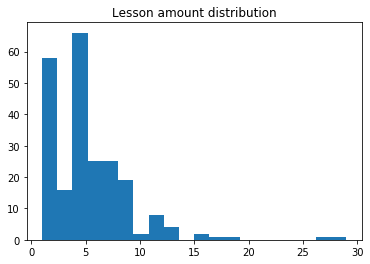

In [7]:
fig, ax = plt.subplots()

ax.hist(lessons_module, bins=20)
ax.set_title("Lesson amount distribution")
plt.show()

### Median number of lessons in module
`Doto`: write an explanation what the f is going on here

In [8]:
# count lessons in each module grouped by courses

subset = dataset[["course_title", "module_number", "lesson_number"]]
subset_grouped = subset.groupby(["course_title", "module_number"]).nunique()
subset_grouped

course_title  module_number  \
course_title                  module_number                                
Excel Базовый                 1.0                       1              1   
                              2.0                       1              1   
                              3.0                       1              1   
                              4.0                       1              1   
                              5.0                       1              1   
...                                                   ...            ...   
Руководитель digital-проектов 13.0                      1              1   
                              14.0                      1              1   
                              15.0                      1              1   
                              16.0                      1              1   
                              17.0                      1              1   

                                             lesson_number  
course_title                  module_number                 
Excel Базовый                 1.0                       11  
                              2.0                        7  
                              3.0                        3  
                              4.0                        7  
                              5.0                        5  
...                                                    ...  
Руководитель digital-проектов 13.0                       4  
                              14.0                       7  
                              15.0                      12  
                              16.0                       8  
                              17.0                       4  

[229 rows x 3 columns]

In [9]:
subset_grouped.groupby(level=0).first()

,course_title,module_number,lesson_number
course_title,,,
Excel Базовый,1,1,11
Java-разработчик,1,1,8
Java-разработчик c нуля,1,1,7
JavaScript с нуля,1,1,7
PHP-разработчик с 0 до PRO. Часть 1,1,1,5
SMM-маркетолог от А до Я,1,1,6
UX-дизайн,1,1,10
Анимация интерфейсов,1,1,3
Веб-вёрстка для начинающих 2.0,1,1,6


In [10]:
# iterate over courses
# for each group
# construct a nested list
# course title and median value in each record


output_list = []

for course_title_, nunique_df in subset_grouped.groupby(level=0):
    output_list.append(
        [course_title_,
         nunique_df["lesson_number"].median()]
    )

pd.DataFrame(output_list, columns=["course title", "median lesson count in module"])

,course title,median lesson count in module
0,Excel Базовый,5.0
1,Java-разработчик,7.0
2,Java-разработчик c нуля,13.0
3,JavaScript с нуля,7.0
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
5,SMM-маркетолог от А до Я,6.0
6,UX-дизайн,3.5
7,Анимация интерфейсов,3.0
8,Веб-вёрстка для начинающих 2.0,7.0
9,Веб-дизайн PRO 2.0,5.0


### Number of students in each course

In [23]:
(
    dataset[["course_title", "student_id"]]
    .groupby("course_title")
    .nunique()
    ["student_id"]
)

course_title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                511
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

### Minimum, maximum, mean, median age of students
`Q` : how to find

`Doto`: formulate the task
1. Plot the distribution and find outliers
2. Clamp

In [12]:
dset_students["birthday"].min().year

1884

Min: 1884-09-23 00:00:00 | Max: 2199-10-07 00:00:00


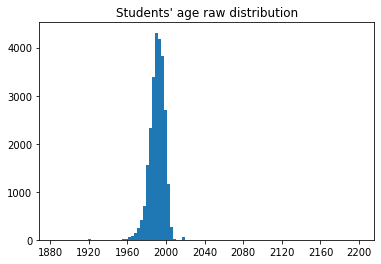

In [13]:
# value distribution

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

print("Min:", dset_students["birthday"].min(), "| Max:", dset_students["birthday"].max())

fig, ax = plt.subplots()

ax.hist(dset_students["birthday"].dropna(), bins=100)
ax.set_title("Students' age raw distribution")
plt.show()

Min: 1884-09-23 00:00:00 | Max: 2199-10-07 00:00:00


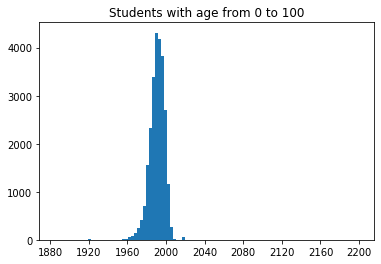

In [14]:
# Clamp

bad_dates_mask = (dset_students["birthday"] > np.datetime64(str(2021))) | (
                dset_students["birthday"] < np.datetime64(str(2021-100)))

# dset_students.loc[bad_dates_mask] = pd.NaT


# Check

print("Min:", dset_students["birthday"].min(), "| Max:", dset_students["birthday"].max())

fig, ax = plt.subplots()

ax.hist(dset_students["birthday"].dropna(), bins=100)
ax.set_title("Students with age from 0 to 100")
plt.show()

### Bar chart of the number of students on each course

In [15]:
plot_data = dataset.groupby("course_title").count()["student_id"]
plot_data

course_title
Excel Базовый                          18666
Java-разработчик                       24030
Java-разработчик c нуля                14301
JavaScript с нуля                      20162
PHP-разработчик с 0 до PRO. Часть 1     5995
SMM-маркетолог от А до Я                7693
UX-дизайн                              23006
Анимация интерфейсов                    5937
Веб-вёрстка для начинающих 2.0         29694
Веб-дизайн PRO 2.0                     17268
Веб-дизайн Базовый                     16826
Веб-дизайн с нуля 2.0                  72906
Веб-разработчик                         5322
Интернет-маркетолог от Ingate          71992
Руководитель digital-проектов          16884
Name: student_id, dtype: int64

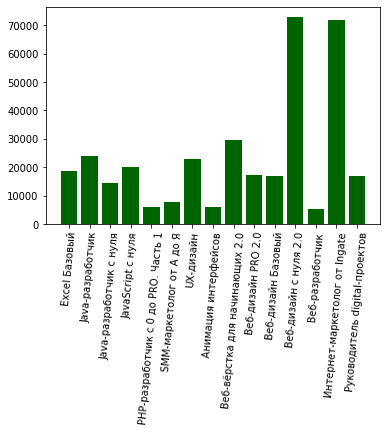

In [16]:
fig, ax = plt.subplots()
ax.bar(plot_data.index, plot_data, color="darkgreen")
ax.tick_params(axis="x", labelrotation=85.0)
plt.show()

### Horizontal bar chart of the number of students on each course

`Doto`: write an explanation

`Note`
* The color of the columns should contain information about the area to which the course belongs (that is, a legend is needed)
* The median line should be plotted on the graph

In [17]:
group_by = dataset.groupby("course_title")
temp_list = []

for name, g in group_by:
    temp_list.append([name,
           g["student_id"].count(),
           g["course_field"].iloc[0]
          ])
    
plot_data = pd.DataFrame(temp_list)
plot_data.columns = ["course_title", "student_count", "course_field"]
plot_data = plot_data.sort_values(by="student_count")


del temp_list
plot_data.head(3)

,course_title,student_count,course_field
12,Веб-разработчик,5322,Development
7,Анимация интерфейсов,5937,Design
4,PHP-разработчик с 0 до PRO. Часть 1,5995,Development


In [18]:
# add color values


colors = ["yellowgreen", "darkorange", "darkgreen", "cornflowerblue", "firebrick"]
color_map = {}

for index_, field_name in enumerate(plot_data["course_field"].unique()):
    color_map[field_name] = colors[index_]

plot_data["color_plot"] = plot_data["course_field"].map(color_map)

plot_data.head(3)

,course_title,student_count,course_field,color_plot
12,Веб-разработчик,5322,Development,yellowgreen
7,Анимация интерфейсов,5937,Design,darkorange
4,PHP-разработчик с 0 до PRO. Часть 1,5995,Development,yellowgreen


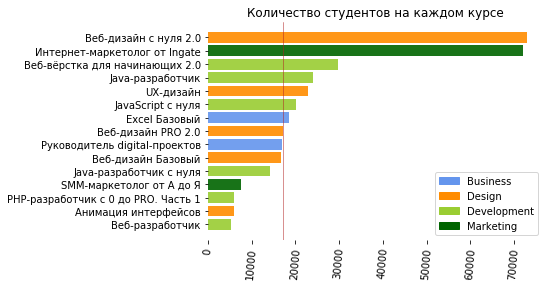

In [19]:
import matplotlib.patches as mpatches
from matplotlib.transforms import Bbox

fig, ax = plt.subplots()

# bar chart
ax.barh(plot_data["course_title"],
        plot_data["student_count"],
        alpha=0.9,
        color=plot_data["color_plot"])

ax.tick_params(axis="x", labelrotation=85.0)
ax.set_title("Количество студентов на каждом курсе")

# median line
ax.axvline(x=plot_data["student_count"].median(),
           color=colors[-1],
           linewidth=.5)

# legend
legend_patches = []
for name_, g_ in plot_data.groupby("course_field"):
    legend_patches.append(mpatches.Patch(label=name_,
                                         color=g_["color_plot"].iloc[0]))

ax.legend(handles=legend_patches)

ax.set_frame_on(False)

plt.show()

### Data description
Based on the calculated values, describe the data (the description must be complete and cover all the metrics obtained above)